In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## static object
state update equation

In [ ]:
## generate measurement data
miu=5
sigma=2
measureTimes=40
Z=np.random.normal(miu,sigma,measureTimes)

In [ ]:
Z

In [ ]:
X=np.zeros(measureTimes+1)
X[0]=miu
for measure in range(measureTimes):
    n=measure+1
    gain=1/n
    X[n]=X[n-1]+gain*(Z[measure]-X[n-1])


In [ ]:
plt.plot(X)
plt.plot(Z,marker='o')
plt.plot([0,measureTimes],[miu,miu])
plt.xlabel("measure times")
plt.ylabel("estimate value")
plt.legend(['estimate','measure','real'])
plt.title("kalman filter for static object")
plt.show()

## $\alpha-\beta$ filter
(g-h filter) for dynamic object (state update)    
state extrapolation equation

### situation design 
a vehicle go at 10m/s, initial site is 0m, and the measure tool is unbiased, but the measurements include random noise(gaussian distribution) 

In [115]:
measureTimes=40
velocity=10 #m/s
interval=0.1 #s 
Narray=np.asarray([n for n in range(measureTimes)])
preciseX=Narray*velocity*interval

In [116]:
Narray
preciseX

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39.])

In [117]:
## generate measurements
Z=np.zeros(measureTimes)
sigma=interval*velocity
for time in range(measureTimes):
    Z[time]=np.random.normal(preciseX[time],sigma,1)

In [118]:
Z

array([ 0.70518568,  0.43682099,  0.68044088,  3.45863471,  4.4535703 ,
        4.73077751,  6.26991089,  6.02251854, 10.55975571,  6.46750555,
        9.49550263, 10.68323354, 10.92820514, 13.92170184, 14.84411798,
       16.01826157, 16.24009988, 15.12436759, 17.57367278, 19.54283277,
       20.82800294, 21.51025953, 23.08857496, 21.66858326, 26.53445258,
       24.49477575, 24.24109977, 26.06719792, 28.86008648, 30.47369616,
       30.59806623, 31.81058542, 34.51632908, 32.01556423, 33.48301682,
       33.54760327, 36.0811135 , 35.74887353, 37.19889261, 40.08390332])

## question
how to make sure the initial value?

In [143]:
def ab_filter(Z,initialX=0,initialV=0,interval=0.1,alpha=0.2,beta=0.1):
    measureTimes=len(Z)
    X=np.zeros(measureTimes+1)
    V=np.zeros(measureTimes+1)
    X[0]=initialX
    V[0]=initialV
    for measure in range(measureTimes):
        n=measure+1
        estimateX=X[n-1]+interval*V[n-1]
        X[n]=estimateX+alpha*(Z[measure]-estimateX)
        V[n]=V[n-1]+beta*(Z[measure]-estimateX)/interval
    return X,V

alpha can not decrease with time anymore, for the state is updating all the time

if update state with large number, the estimation is not so stable
how about minimize the interval

!!! important the error times by kalman gain is not new value, but estimate value according to prediction

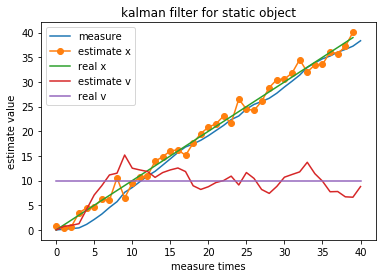

In [120]:
X,V=ab_filter(Z=Z)
plt.plot(X)
plt.plot(Z,marker='o')
plt.plot(preciseX)
plt.plot(V)
plt.plot([0,measureTimes],[velocity,velocity])
plt.xlabel("measure times")
plt.ylabel("estimate value")
plt.legend(['measure','estimate x','real x','estimate v','real v'])
plt.title("kalman filter for static object")
plt.show()

In [ ]:
V

In [ ]:
X

## acceleration
fighter aircraft has acceleration, use $\alpha-\beta$ filter above will lead to a lag error
- lag error causes:
    - dynamic error
    - systematic error
    - bias error
    - truncation error(截断误差)


In [129]:
measureTimes=40
interval=1 #s 
former=15
latter=measureTimes-former
constA=16
accelaration=np.append(np.zeros(15),8*np.ones(latter))
initialV=40
initialX=0
velocity=[initialV+np.sum(accelaration[:n])*interval for n in range(measureTimes)] #m/s before 15 intervals
Narray=np.asarray([n for n in range(measureTimes)])
preciseX=[initialX+np.sum(velocity[:n])*interval for n in range(measureTimes)]

In [130]:
## generate measurements
Z=np.zeros(measureTimes)
sigma=0.1
for time in range(measureTimes):
    Z[time]=np.random.normal(preciseX[time],sigma,1)

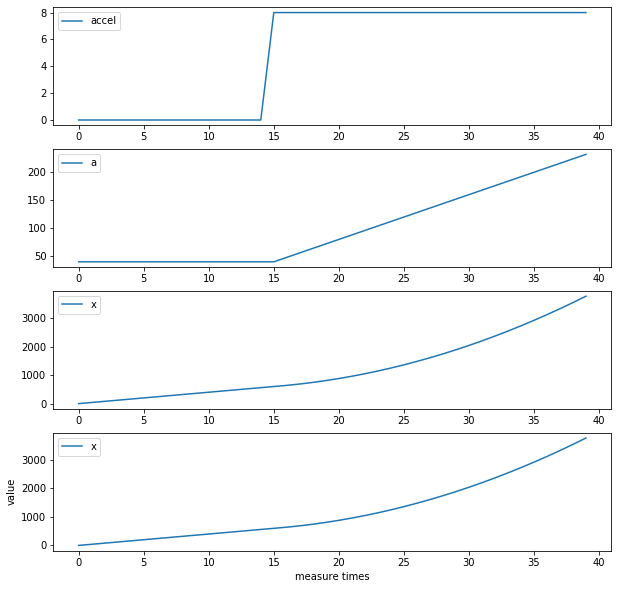

In [131]:
fig=plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(accelaration,label='a')
plt.legend()
plt.subplot(412)
plt.plot(velocity,label='v')
plt.legend()
plt.subplot(413)
plt.plot(preciseX,label='x')
plt.legend()
plt.subplot(414)
plt.plot(Z,label='x')
plt.legend()
plt.xlabel("measure times")
plt.ylabel("value")
#['measure','estimate x','real x','estimate v','real v'])
plt.show()

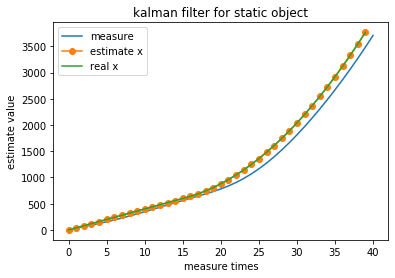

In [158]:
X,V=ab_filter(Z=Z,initialX=initialX,initialV=initialV,interval=interval)
plt.plot(X)
plt.plot(Z,marker='o')
plt.plot(preciseX)
plt.xlabel("measure times")
plt.ylabel("estimate value")
plt.legend(['measure','estimate x','real x','estimate v','real v'])
plt.title("kalman filter for static object")
plt.show()

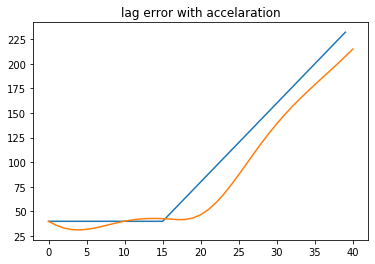

In [159]:
plt.plot(velocity)
plt.plot(V)
plt.title('lag error with accelaration')
plt.show()

## design $\alpha-\beta-\gamma$ filter
consider accelaration 

the current estimation use measurements to update(Z and $\hat{X}_{n,n-1}$)      
the next state prediction uses dynamic model    
the ^ in python is not pow but bitor!


In [201]:
def aby_filter(Z,initialX=0,initialV=0,initialA=0,interval=0.1,alpha=0.2,beta=0.1,gamma=0.1):
    measureTimes=len(Z)
    X=np.zeros(measureTimes+1)
    V=np.zeros(measureTimes+1)
    A=np.zeros(measureTimes+1)
    X[0]=initialX
    V[0]=initialV
    A[0]=initialA
    for measure in range(measureTimes):
        n=measure+1
        estimateX=X[n-1]+interval*V[n-1]+(1/2)*np.power(interval,2)*A[n-1]
        estimateV=V[n-1]+interval*A[n-1]
        X[n]=estimateX+alpha*(Z[measure]-estimateX)
        V[n]=estimateV+beta*(Z[measure]-estimateX)/interval
        A[n]=A[n-1]+gamma*(Z[measure]-estimateX)/(0.5*np.power(interval,2))
    return X,V

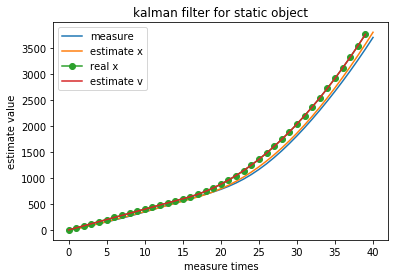

In [202]:
X2,V2=aby_filter(Z=Z,initialX=initialX,initialV=initialV,interval=interval,alpha=0.5,beta=0.01,gamma=0.01)
plt.plot(X)
plt.plot(X2)
plt.plot(Z,marker='o')
plt.plot(preciseX)
plt.xlabel("measure times")
plt.ylabel("estimate value")
plt.legend(['measure','estimate x','real x','estimate v','real v'])
plt.title("kalman filter for static object")
plt.show()

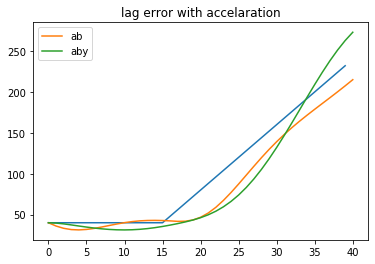

In [203]:
plt.plot(velocity)
plt.plot(V,label='ab')
plt.plot(V2,label='aby')
plt.title('lag error with accelaration')
plt.legend()
plt.show()